In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m

In [28]:
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    Nq = len(q)
    Nx = len(X)
    Ny = len(Y)
    
    M = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            s = 0
            for k in range(Nq):
                s = s + q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
            
            M[i, j] = s/(4*e0*m.pi)
    return M     

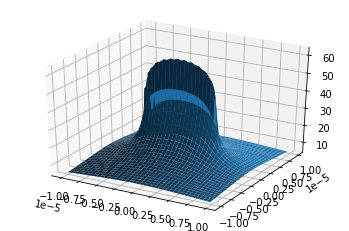

In [29]:
e=1.6e-16
R_0 = 1e-6
N = 50
q = []
for i in range(N):
    q.append(e)

x1 = -5*R_0
x2 = 5*R_0

xq = []
for i in range(N):
    xq.append(x1 + (x2 - x1)/N * i)
yq = np.zeros(N)

N1 = 79
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(y1, x1, M, linewidth=0)

#plt.show()


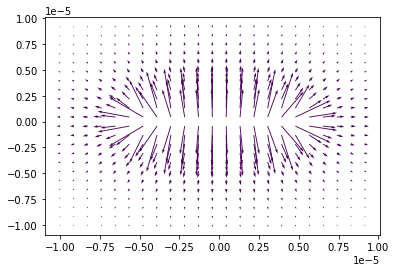

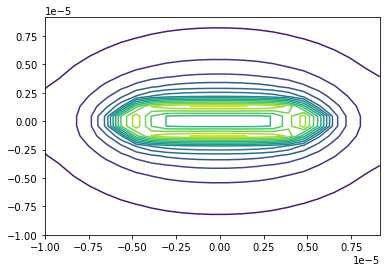

In [31]:
e=1.6e-16
R_0 = 1e-6
N = 50
q = []
for i in range(N):
    q.append(e)

x1 = -5*R_0
x2 = 5*R_0

xq = []
for i in range(N):
    xq.append(x1 + (x2 - x1)/N * i)
yq = np.zeros(N)

N1 = 23
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)
px, py = np.gradient(-M, 0.1, 0.1)

px1 = px#/((px**2 + py**2)**0.5)
py1 = py#/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 17)

In [32]:
def phiOfDipole(q, qx, qy, lx, ly, X, Y):
    e0 = 8.85e-12
    Nx = len(X)
    Ny = len(Y)
    
    M = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            phi = q * (lx * X[i] + ly * Y[j])
            R = ((qx - X[i])**2 + (qy - Y[j])**2)**1.5
            
            phi = phi / R
            
            M[i, j] = phi/(4*e0*m.pi)
    return M 

In [33]:
def phiOfQuadropole(q, qx, qy, delta, lx, ly, X, Y):
    M = phiOfDipole(q, qx-delta, qy, lx, ly, X, Y) + phiOfDipole(q, qx+delta, qy, -lx, -ly, X, Y)
    return M 

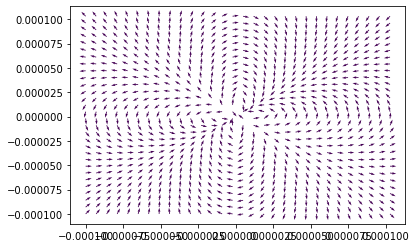

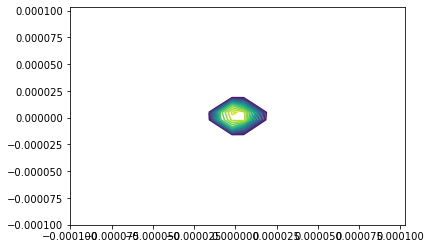

In [34]:
e=1.6e-16
R_0 = 1e-6

N1 = 30
x_min = -100*R_0
y_min = -100*R_0

x_max = 110*R_0
y_max = 110*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phiOfQuadropole(e, R_0, R_0, R_0, 0, 1, x, y)

x1, y1 = np.meshgrid(x, y)
px, py = np.gradient(-M, 0.1, 0.1)

px1 = px/((px**2 + py**2)**0.5)
py1 = py/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 17)

# Magniti

In [35]:
def phiOfMagDipole(Mx, My, x, y, X, Y):
    Nx = len(X)
    Ny = len(Y)
    
    Bx = np.zeros((Nx, Ny))
    By = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            R = (x-X[i])**2 + (y-Y[j])**2
            MR = Mx * X[i] + My * Y[j]
            
            Bx[i, j] = 3 * MR / R**2.5 * X[i] - Mx / R**1.5
            By[j, i] = 3 * MR / R**2.5 * Y[j] - My / R**1.5
            
            
    return (Bx, By)        

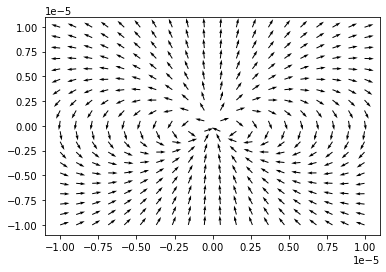

In [36]:
e=1.6e-16
R_0 = 1e-6

N1 = 20
x_min = -10*R_0
y_min = -10*R_0

x_max = 11*R_0
y_max = 11*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min + (x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
Mx, My = phiOfMagDipole(0, 45 * 10**-5, 0, 0, x, y)

mp = (Mx**2 + My**2)**0.5

mx = Mx / mp
my = My / mp

x1, y1 = np.meshgrid(x, y)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(x, y, mx, my)

# Lorentz

In [37]:
H = [0, 0, 1]

def lorenz_force(t, z):
    f = np.zeros(6)
    f[0] = z[1]
    f[1] = 2*m.pi*(H[2]*z[3] - H[1]*z[5])
    f[2] = z[3]
    f[3] = -2*m.pi*(H[2]*z[1] - H[0]*z[5])
    f[4] = z[5]
    f[5] = 2*m.pi*(H[1]*z[1] - H[0]*z[3])
    
    return f

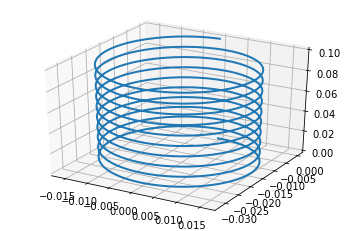

In [38]:
x0 = 0
y0 = 0
z0 = 0

vx0 = 0.1
vy0 = 0
vz0 = 0.01

t0, t1 = 0, 10                   # start and end

t = np.linspace(t0, t1, 1000)    # the points of evaluation of solution
R0 = [x0, vx0, y0, vy0, z0, vz0] # initial value

#sol = integrate.odeint(lorenz_force, R0, t)
R = np.zeros((len(t), len(R0)), dtype=np.float64) # array for solution
R[0, :] = R0

r = integrate.ode(lorenz_force).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)                               # initial values

for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)

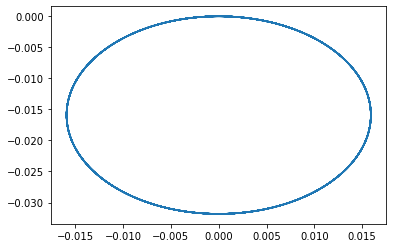

In [39]:
# x y 
plt.plot(R[:, 0], R[:, 2])

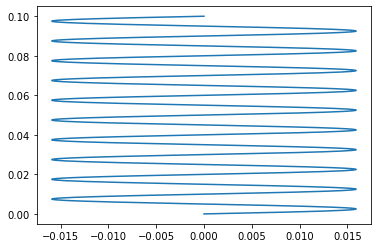

In [40]:
# x z
plt.plot(R[:, 0], R[:, 4])

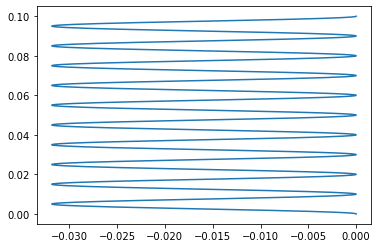

In [41]:
# y z
plt.plot(R[:, 2], R[:, 4])

In [42]:
# 2
Rad = (max(R[:, 0]) - min(R[:, 0])) / 2
Tc = 2 * np.pi * Rad / (vx0**2 + vy0**2 + vz0**2)**0.5 
Tc

0.9950359516808653

In [76]:
# 3
def simulate(vz = 0.01, accuracy = 1000):
    x0 = 0
    y0 = 0
    z0 = 0

    vx0 = 0.1
    vy0 = 0
    vz0 = vz

    t0, t1 = 0, 10                   # start and end

    t = np.linspace(t0, t1, accuracy)    # the points of evaluation of solution
    R0 = [x0, vx0, y0, vy0, z0, vz0] # initial value

    #sol = integrate.odeint(lorenz_force, R0, t)
    R = np.zeros((len(t), len(R0)), dtype=np.float64) # array for solution
    R[0, :] = R0

    r = integrate.ode(lorenz_force).set_integrator("dopri5")  # choice of method
    r.set_initial_value(R0, t0)                               # initial values

    for i in range(1, t.size):
        R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)
    
    return R

Шаг при начальной скорости 0.01:  0.00010010010010010008
Шаг при начальной скорости 0.05:  0.0005005005005005005


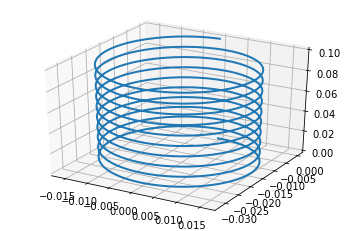

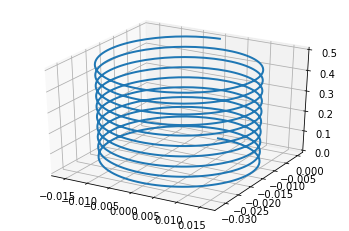

In [77]:
R1 = simulate(0.01)
R2 = simulate(0.05)

print("Шаг при начальной скорости 0.01: ", R1[:, 4][1]-R1[:, 4][0])
print("Шаг при начальной скорости 0.05: ", R2[:, 4][1]-R2[:, 4][0])

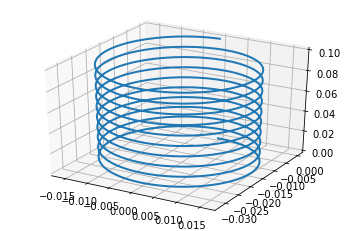

In [52]:
#4
R = simulate()

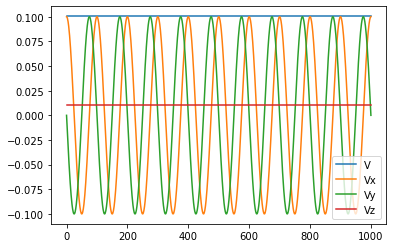

In [71]:
V = [np.sqrt(R[:, 1][i]**2 + R[:, 3][i]**2 + R[:, 5][i]**2) for i in range(len(R[:, 1]))]

plt.plot(np.linspace(0, len(V), len(V)), V, label="V")
plt.plot(np.linspace(0, len(V), len(V)), R[:, 1], label="Vx")
plt.plot(np.linspace(0, len(V), len(V)), R[:, 3], label="Vy")
plt.plot(np.linspace(0, len(V), len(V)), R[:, 5], label="Vz")

plt.legend()
plt.show()

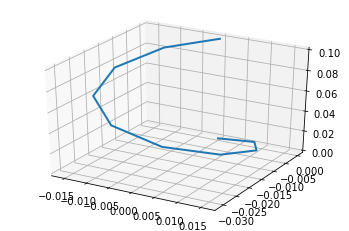

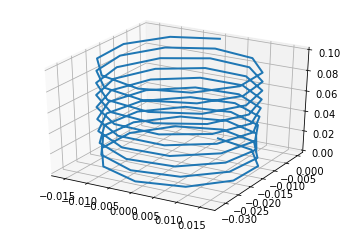

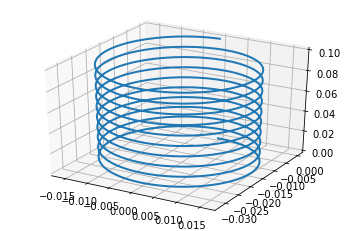

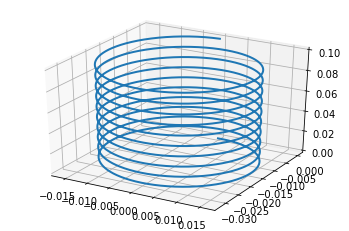

In [82]:
#5
simulate(accuracy=10)
simulate(accuracy=100)
simulate(accuracy=1000)
simulate(accuracy=10000)
pass